SELECT 
    block_timestamp, value 
FROM
    `bigquery-public-data.crypto_ethereum.transactions` AS transactions
WHERE
    block_timestamp < '2022-04-01 00:00:00'

Here the 'value' attribute has to be converted to understandable form from wei to the default ether_value before the data to be extracted. One ether is 10 ^ 18 weis, i.e 1 eth = wei(10^18).

SELECT 
    block_timestamp, (SUM(value) / power(10,18)) AS total_value 
FROM
    `bigquery-public-data.crypto_ethereum.transactions` AS transactions
WHERE
    block_timestamp < '2022-04-01 00:00:00'

The columns date, ether value can be used to convert the table into a dataframe, ordering query using the recent dates.




The 'block_timestamp' has to be converted into Date format in order group by date to get the ether_value per day data

SELECT 
    DATE(block_timestamp) AS date, (SUM(value) / power(10,18)) AS total_value 
FROM
    `bigquery-public-data.crypto_ethereum.transactions` AS transactions
WHERE
    block_timestamp < '2022-04-01 00:00:00'
GROUP BY date
ORDER BY date

The resulting query results in processing 80 GB of data out of which only a sample of 1GB can be saved as CSV which is set in sharing mode to access as URL

In [ ]:
#trail using google drive shared csv file (about 1 GB) instead of local csv file(about 10 MB) for the query.
import pandas
URL = 'https://drive.google.com/file/d/1qYNgxTotswrGlcEFVRQ6-CUCxp6aR9yN/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pandas.read_csv(path)
df.head()

,date,total_value
0,2015-08-07,2.008723e+06
1,2015-08-08,1.358322e+07
2,2015-08-09,1.165455e+06
3,2015-08-10,1.670911e+06
4,2015-08-11,1.485732e+06


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

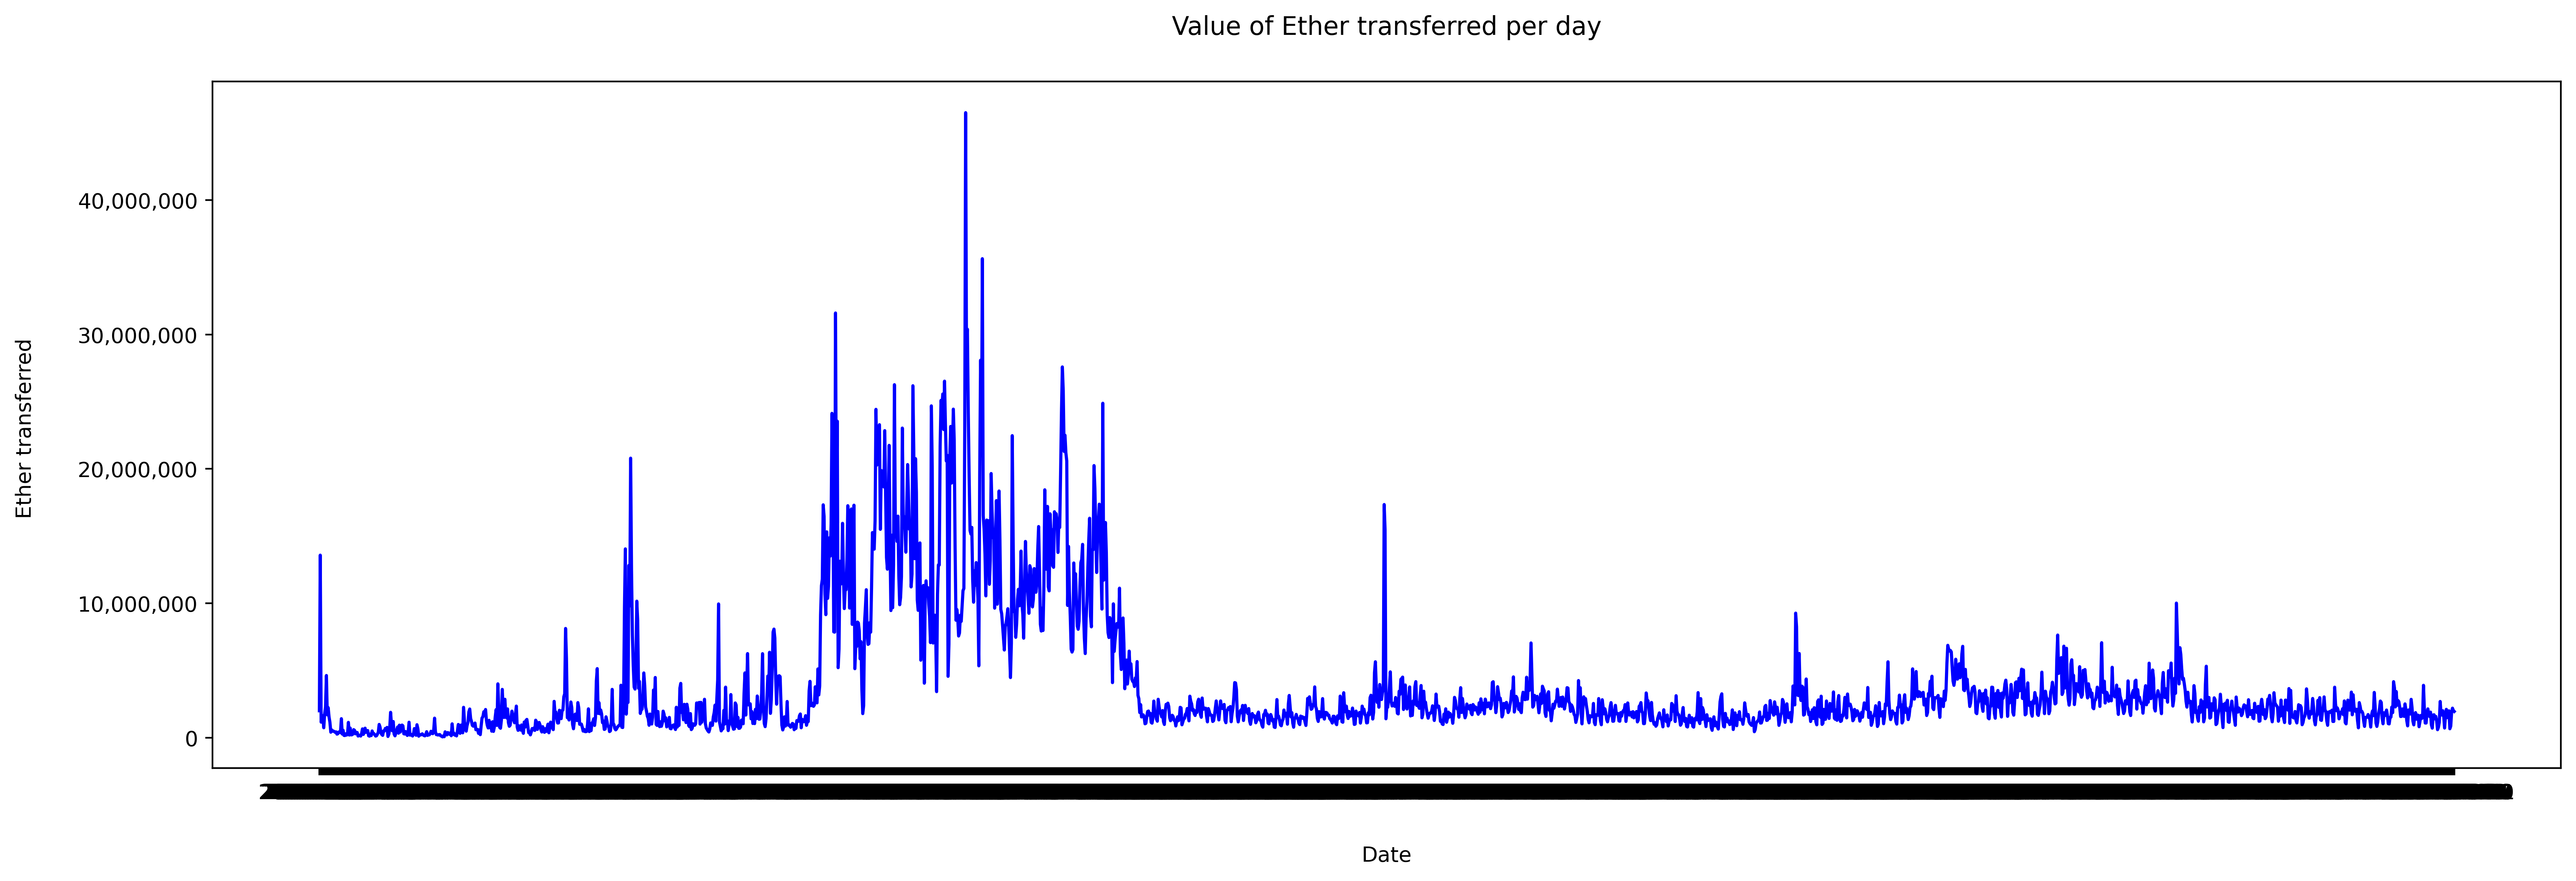

In [ ]:
fig, axs = plt.subplots(figsize=(20, 6))
axs.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Value of Ether transferred per day", y=1.05)
plt.xlabel("Date", labelpad=20)
plt.ylabel("Ether transferred ", labelpad=20)
sns.lineplot(x="date", y="total_value", data=df, color="blue")
plt.gcf().set_dpi(400)
plt.show(fig)

In [ ]:
#convert the wei which is in exponential to integer to find min and max 
def weiNumpy_to_weiInt(wei_numpy):
    wei_int = int(wei_numpy)
    return wei_int

In [ ]:
df["wei_int"] = df.total_value.apply(weiNumpy_to_weiInt)
df.head()

,date,total_value,wei_int
0,2015-08-07,2.008723e+06,2008722
1,2015-08-08,1.358322e+07,13583219
2,2015-08-09,1.165455e+06,1165455
3,2015-08-10,1.670911e+06,1670910
4,2015-08-11,1.485732e+06,1485731


In [ ]:
#creating a dataframe of the maximum value in total value column
df[df["total_value"] == df["total_value"].max()]

,date,total_value,wei_int
735,2017-08-11,4.649573e+07,46495729


Hence the Maximum ether found was 46475729 on 2017-08-11 which is equivalent to 162982873735.57 USD

In [ ]:
#similarly finding the value which has the minimum amount of ether
df[df["total_value"] == df["total_value"].min()]

,date,total_value,wei_int
140,2015-12-25,68608.897945,68608


Note: The query initially written was to get ether values > 0, out which only a 1 GB of rows is taken, where  ether value = 65608

In [ ]:
#finding the average ether value in total
df["total_value"].sum()

9109175265.92592

In [ ]:
df["total_value"].mean()

3750175.078602685

Average value of ether found was 3750175 which is 13145600932.75 USD